- 0 A)

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns


df_english = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Engelska", skiprows=8)
df_mathematics = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Matematik", skiprows=8)
df_swedish = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Svenska", skiprows=8)
df_swedish_2 = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Svenska som andraspråk", skiprows=8)
df_english

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [323]:
def change_columns(dataframes, rename_list):
    """Method for changing several column names"""
    for dataframe in dataframes:
        column_mapping = {dataframe.columns[i]: col_name for i, col_name in enumerate(rename_list)}
        dataframe.rename(columns=column_mapping, inplace=True)


rename_list = [
        "Riket",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (Poäng)",
        "Flickor (Poäng)",
        "Pojkar (Poäng)"
]

dfs = [df_mathematics, df_english, df_swedish, df_swedish_2]
change_columns(dfs, rename_list)
df_mathematics

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


-------------------

- 0 B)

In [324]:
boys_passed = round(df_mathematics.loc[0, "Pojkar (A-F)"] * df_mathematics.loc[0, "Pojkar (A-E)"] / 100)
girls_passed = round(df_mathematics.loc[0, "Flickor (A-F)"] * df_mathematics.loc[0, "Flickor (A-E)"] / 100)

print(boys_passed)
print(girls_passed)

49420
45723


-----------------

- 0 C)

In [325]:
# create a method for this that takes a dataframe as arugment and the index vales 0, 8
total_points_english = df_english.iloc[0, 8]
print(total_points_english)

total_points_mathematics = df_mathematics.iloc[0, 8]
print(total_points_mathematics)

total_points_swedish = df_swedish.iloc[0, 8]
print(total_points_swedish)

total_points_swedish_2 = df_swedish_2.iloc[0, 8]
print(total_points_swedish_2)





15.7
11.9
13.6
9.4


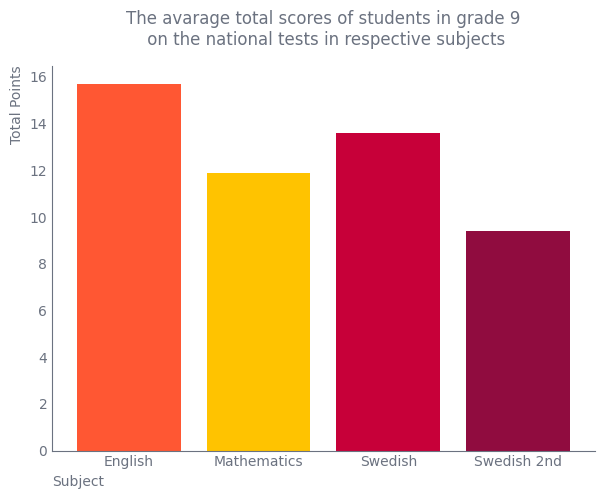

In [326]:
GRAY1 = "#6b7280"

categories = ["English", "Mathematics", "Swedish", "Swedish 2nd"]
total_points = [total_points_english, total_points_mathematics, total_points_swedish, total_points_swedish_2]

fig, ax = plt.subplots(figsize=(7, 5))

colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F"]  

bars = ax.bar(categories, total_points, color=colors)
ax.set_ylabel('Total Points', loc="top", color=GRAY1)
ax.set_xlabel('Subject', loc="left", color=GRAY1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(GRAY1)
ax.spines["bottom"].set_color(GRAY1)

ax.tick_params(colors=GRAY1)

ax.set_title("The avarage total scores of students in grade 9\n on the national tests in respective subjects", pad=15, color=GRAY1, fontsize=12)
#Alternative to the design is to use: plt.style.use("../labb_2/styles/base.mplstyle") although i wanted use manunal desgins

fig.savefig("Visualisering/plot_c_.png")


----------

-  0 D)

In [327]:
"""drop empty row in one of the excel sheets"""
df_swedish_2
index_to_drop = 3
df_swedish_2.drop(index_to_drop, inplace=True)


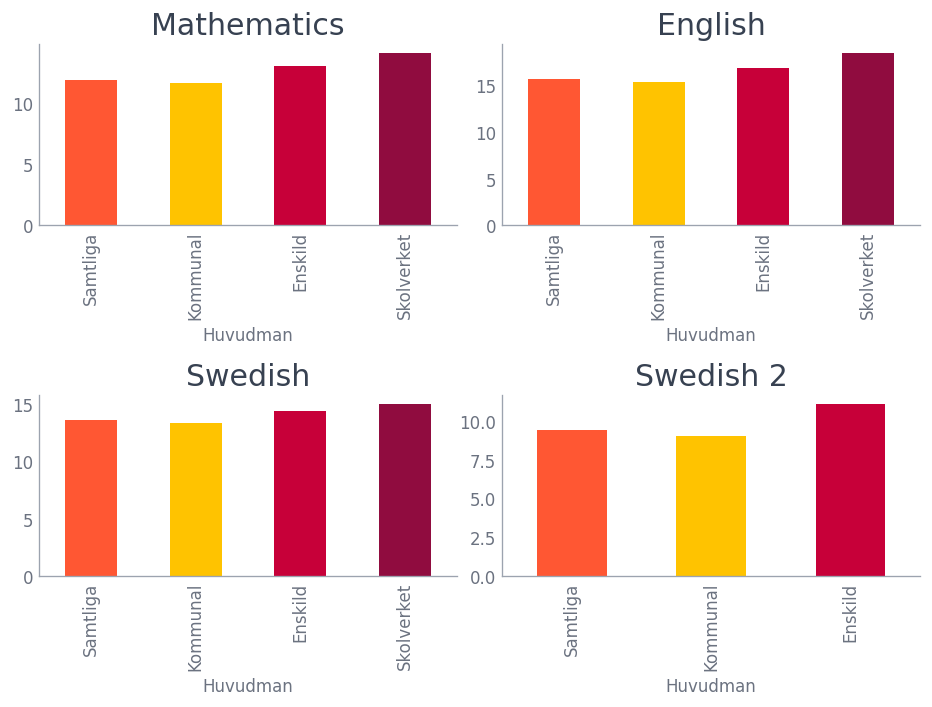

In [328]:
plt.style.use("../labb_2/styles/base.mplstyle")

fig, axes = plt.subplots(2, 2, dpi=120, figsize=(8, 6))
dfs = [df_mathematics, df_english, df_swedish, df_swedish_2]
titles = ["Mathematics", "English", "Swedish", "Swedish 2"]


for ax, df, title in zip(axes.flatten(), dfs, titles):
    df.plot(kind="bar", x="Huvudman", y="Totalt (Poäng)", ax=ax, title=title, legend=False, color=colors)


plt.tight_layout()
plt.show()
fig.savefig("Visualisering/plot_d_.png")


- skapar en template for desing för plotly, finns också färdiga. Dock kommer eventuellt inte komma till användning då jag är intresserad av att göra det manuell då jag vill lära mig innan 

In [329]:
import plotly.io as pio

custom_template = dict(
    layout=dict(
        title=dict(font=dict(family="Arial", size=20, color="blue")),
        font=dict(family="Arial", size=12),
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(showgrid=False), 
        yaxis=dict(showgrid=True))
    )

pio.templates["custom_template"] = custom_template


- 1 A)

In [330]:
df_table1b_first = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7, skipfooter=23 )

df_table1b_first



,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [331]:
df_table1b_first = df_table1b_first.rename(columns={"Totalt.2": "Avarage", "Unnamed: 0": "Year", "Pojkar.2": "Boys", "Flickor.2": "Girls"})



fig = px.line(df_table1b_first, y=["Avarage", "Boys", "Girls"], x="Year", title="Precentage who failed one or more subject", markers=True)

fig.update_layout(yaxis_title="Precentage who failed")
fig.show()

fig.write_html("Visualisering/plot_1a_.html")



--------------

- 1 B)

In [332]:
df_table1b_second = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7, skipfooter=23 )
df_table1b_second

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [333]:
df_table1b_second = df_table1b_second.rename(columns={"Unnamed: 0": "År", "Totalt": "Medelvärde", "Flickor": "Flickor", "pojkar": "Pojkar"})

fig = px.line(df_table1b_second, y=["Medelvärde", "Flickor", "Pojkar"], x="År", title="snittvärde på elevers meritpoäng per år", markers=True, line_shape="spline")

fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=True))

fig.show()
fig.write_html("Visualisering/plot_1b_.html")


-------------------------------------

- 1 C)

In [334]:
df_table1b_third = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7)

df_table1b_third

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
7,Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
8,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18.0,17.7,18.3


In [335]:
df_table1b_third_sorted = df_table1b_third.rename(columns={"Unnamed: 0": "Föräldrars utbildning", "Totalt": "Elevers meritpoäng"})

gray, red = "#4b5563", "#be123c" 

categories = df_table1b_third_sorted.loc[22:24]

fig = px.bar(categories, y="Elevers meritpoäng", x="Föräldrars utbildning", title="Elevers meritpoäng beroende på deras föräldrars utbildning",)

fig.update_traces(marker_color=[gray, red, red])

fig.show()
fig.write_html("Visualisering/plot_1c_1.html")


In [336]:
df_table1b_fourth = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7)
df_table1b_fourth

student_compare = df_table1b_fourth.loc[12:13]
colors = px.colors.qualitative.Set1

student_compare = student_compare.rename(columns={"Unnamed: 0": "Elever", "Totalt": "Genomsnitt meritpoäng", "Flickor": "Flickor", "pojkar": "Pojkar"})
catergory_orders={"sex": ["Flickor", "Pojkar"]}

fig = px.bar(student_compare, 
            x="Genomsnitt meritpoäng", 
            y="Elever", 
            color_discrete_sequence=colors,
            width=1000, height=500,
  # Does not work...
             )

fig.update_layout(
    title="total merit beroende på elevers bakgrund",
    xaxis_title="Meritpoäng",
    yaxis_title="Elever",
    font=dict(size=14),  
    legend=dict(title=None, orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    bargap=0.2, 
    xaxis=dict(tickfont=dict(size=12)),  
    yaxis=dict(tickfont=dict(size=12)),  
)
fig.update_layout(font=dict(family="Arial", size=12))
fig.update_layout(xaxis=dict(showgrid=True), yaxis=dict(showgrid=False))
fig.update_layout(title=dict(x=0.50, y=0.95))  


fig.update_xaxes(tickangle=45)

fig.show()
fig.write_html("Visualisering/plot_1c_2.html")

In [337]:
def read_excels(excel, skiprow_count, skipfooter_count):
    """Method to read excels and skip rows and footer"""
    df_name = pd.read_excel(excel, skiprows=skiprow_count, skipfooter=skipfooter_count)
    return df_name




---------------

- 2A)

-  Jämförelse av betygresultat över tid, gymnasieskola, fokus på antal elever som är behöriga för högskola mellan termin 2022/2023 - 2017/2018)

In [338]:
df_highschool = read_excels("C:/Users/Noah7/code/Github/Python-Noah-Eliasson-OPA23/data/Gymnasieskola - Jämförelse av betygsresultat över tid 2023 Län (1).xlsx", 7, 0)



df_highschool_new = df_highschool[(df_highschool['Uppgift'] == "Genomsnittlig betygspoäng") & (df_highschool["Typ av huvudman"] == "Samtliga")]

df_highschool_new = df_highschool_new.reset_index(drop=True)
df_highschool_new

,Län,Länskod,Typ av huvudman,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
0,Blekinge län,10,Samtliga,Genomsnittlig betygspoäng,14,14.3,14.3,14.3,14.3,14.2,14.3,14.2,14,14
1,Dalarnas län,20,Samtliga,Genomsnittlig betygspoäng,14.1,14.1,14.2,14.2,14.1,14.1,14.2,14.1,14,13.9
2,Gotlands län,9,Samtliga,Genomsnittlig betygspoäng,14.1,14.4,14.8,14.6,14.6,14.2,14.4,14.2,14.1,14
3,Gävleborgs län,21,Samtliga,Genomsnittlig betygspoäng,14.3,14.2,14.3,14.2,14,14.1,14,13.8,13.7,13.8
4,Hallands län,13,Samtliga,Genomsnittlig betygspoäng,14.4,14.4,14.4,14.3,14.1,14.1,14,14,14,13.9
5,Jämtlands län,23,Samtliga,Genomsnittlig betygspoäng,14.1,14.1,14.2,14.2,14.1,14.1,14.2,14.1,14,13.9
6,Jönköpings län,6,Samtliga,Genomsnittlig betygspoäng,14.2,14.3,14.3,14.3,14.3,14.2,14.2,14,14,14
7,Kalmar län,8,Samtliga,Genomsnittlig betygspoäng,14.4,14.6,14.6,14.6,14.4,14.4,14.2,14.2,14,13.7
8,Kronobergs län,7,Samtliga,Genomsnittlig betygspoäng,14,13.9,13.9,14,14,13.9,14,13.8,13.6,13.8
9,Norrbottens län,25,Samtliga,Genomsnittlig betygspoäng,14.3,14.4,14.4,14.4,14.2,14.3,14.3,14.1,14.1,14.1


linjediagrammet visar hur betygspoäng ser ut över tid, vissa faktorer bidrar till att stockholms län har högsta betygspoäng till skillnad från kronobergs län?

kanske kostnad per elev ökar betygspoäng?

In [339]:
df_highschool_here = pd.melt(
    df_highschool_new,
    id_vars= "Län",
    value_vars= { "2013/14","2014/15","2015/16","2016/17","2017/18","2018/19", "2019/20", "2020/21", "2021/22", "2022/23"},
    var_name= "År",
    value_name= "Betygspoäng"
)

# dataframe is not sorted when printing out, sort_values by ascending order to plot correctly 
df_highschool_here_sorted = df_highschool_here.sort_values(by='År')

fig = px.line(df_highschool_here_sorted, x="År", y="Betygspoäng", color="Län", markers=True)
fig.show()
fig.write_html("Visualisering/plot_2a.html")

- Jag väljer att begränsa län som vi har med i nedan grafer för att förtydliga. 

In [340]:
countys_to_keep = [
    "Stockholms län",
    "Uppsala län",
    "Kronobergs län",
    "Jönköpings län",
    "Örebro län"
]

df_highschool_here_filtered = df_highschool_here[df_highschool_here['Län'].isin(countys_to_keep)]

df_highschool_here_filtered_sorted = df_highschool_here_filtered.sort_values(by='År')

fig = px.line(df_highschool_here_filtered_sorted, x="År", y="Betygspoäng", color="Län", markers=True)
fig.show()
fig.write_html("Visualisering/plot_2a_2.html")

- Nedan graf påvisar om genomsnittligt spenderande på en elever ökar betygspoäng

In [341]:
df_spending_2022 = read_excels("C:/Users/Noah7/code/Github/Python-Noah-Eliasson-OPA23/data/Gymnasieskola - Kostnader per län 2022 Län.xlsx", 7, 0)
df_spending_2022_filtered = df_spending_2022[df_spending_2022['Län'].isin(countys_to_keep)]

In [342]:
import plotly.graph_objs as go

df_highschool_here_2022 = df_highschool_here_filtered_sorted[df_highschool_here_filtered_sorted["År"] == "2022/23"]
df_highschool_here_2022 = df_highschool_here_2022.sort_values(by="Betygspoäng")

merged_df = pd.merge(df_highschool_here_2022, df_spending_2022_filtered, on="Län", how="inner")

# Create traces per df
trace_grade_score = go.Scatter(
    x=merged_df["Län"],
    y=merged_df["Betygspoäng"],
    mode="lines+markers",
    name="Average Grade Score",
    line=dict(color="red", width=2), 
    marker=dict(symbol="circle", size=6),
)

trace_spending_2022 = go.Scatter(
    x=merged_df["Län"],
    y=merged_df["Totalt per elev"],
    mode="lines+markers",
    name="Average Spending per Student",
    yaxis="y2",  # Assigning the second y-axis 
    line=dict(color="blue", width=2),  
    marker=dict(symbol="circle", size=6),  
)

layout = go.Layout(
    title="Average Grade Score vs. Average Spending per Student in 2023",
    xaxis=dict(title="County"),
    yaxis=dict(title="Average Grade Score", gridcolor="slategrey"),  
    yaxis2=dict(title="Average Spending per Student", overlaying="y", side="right", gridcolor="lightgray"), 
    xaxis_tickangle=-45,
    legend=dict(x=0.75, y=1.25),  
    plot_bgcolor="white",  

)

fig = go.Figure(data=[trace_grade_score, trace_spending_2022], layout=layout)

fig.show()
fig.write_html("Visualisering/plot_2a_3_final.html")


# Slutsats
- Ovan graf påvisar inte "att om ett län spenderar mer kroner per elev så resulterar det i högre betygspoäng", motsatsen visas nästintill, vi kan eventuellt dra slutsatsen att mer kronor spenderade är en följd av lägre betygspoäng

-------------------------------------------------

- 2B)

- Nedan visar och utforskar om högre betygspoäng leder till vidarestudier eller om man etablerar sig efter gymnasiet (arbetar)

In [343]:
#Note, code from above same excel diffrent countys
countys_to_keep = [
    "Blekinge län",
    "Dalarnas län",
    "Gotlands län",
    "Gävleborgs län",
    "Hallands län",
    "Jämtlands län",
    "Jönköpings län",
    "Kalmar län",
]

df_highschool_here_filtered = df_highschool_here[df_highschool_here['Län'].isin(countys_to_keep)]

df_highschool_here_filtered_sorted = df_highschool_here_filtered.sort_values(by='År')

fig = px.line(df_highschool_here_filtered_sorted, x="År", y="Betygspoäng", color="Län", markers=True)
fig.show()
fig.write_html("Visualisering/plot_2b_1.html")

intressanta är att se om nyexaminerade studenter från nedan är mer benägna att studera efter studenten de då har högre snitt i betygspoäng
- Gotlands län
- Kalmar län
- Hallands län

också intresant att titta på nedan är mer benägna att studera eller arbeta efter studenten då det har lägre snitt betyg i relation till ovan län 
- Jönköpings län
- Gävleborgs län
- Dalarnas län
- Blekinge län


In [344]:
df_subject_results = read_excels("../data/Gymnasieskola - Vad ungdomar gör efter gymnasieskolan 2013 Län.xlsx", 9, 0)

indices_to_select = [0, 3, 7, 10, 13, 17, 20, 24]

new_df = df_subject_results.iloc[indices_to_select]

new_df.drop(["Länskod", "Typ av huvudman", "Antal ungdomar"], axis=1, inplace=True)

new_df.rename(columns={"Etablerade": "Arbetande"}, inplace=True)

melted_df = pd.melt(
            new_df, 
            id_vars='Län',
            var_name='Procent typ', 
            value_name='procent')

new_melted_df = melted_df.iloc[:-32]

melted_df_here = pd.melt(new_melted_df, id_vars='Län', var_name='år', value_name='Betygspoäng')

colors = px.colors.qualitative.Set1

fig = px.bar(new_melted_df, y="procent", x="Län", color="Procent typ",
              labels={"Percentage": "Procent", "Län": "län", "Percentage_Type": "Procent typ"},
              title="Procent av arbetande och studerande studenter i olika län efter gymnasiet,<br>(resterande procent fattas från skolverket)",
              width=1000, height=600,
              color_discrete_sequence=colors
              )

fig.update_layout(font=dict(family="Arial", size=12))
fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=True))
fig.update_layout(title=dict(x=0.08, y=0.9))  

fig.show()
fig.write_html("Visualisering/plot_2b_2.html")

C:\Users\Noah7\AppData\Local\Temp\ipykernel_31396\2395810573.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Noah7\AppData\Local\Temp\ipykernel_31396\2395810573.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Slutsats

Mina tanke var att se om högre betygspoäng leder till vidarestudier efter gymnasiet:

Var eventuellt mer benägna att studera:
- Gotlands län 
- Kalmar län
- Hallands län

Var mindre benägna att studera:
- Jönköpings län
- Gävleborgs län
- Dalarnas län
- Blekinge län


Dock verkar det inte som att det finnas ett övertygande samband, denna grafen visar dock nyexaminerade från gymnasiet endast 1 år efter studenten, det finns också en andel som inte har någon sysselsättning som fattas från skolverkets statistik. 

sammanfattningsvis ser vi att det finns ett mönster. Vi ser dock inte att högre betygspoäng leder till högre benägenhet att börja studera efter gymnasiet då blekinge län med ett lågt snitt har en stor andel som studerar och gotlands län har stor andel som jobbar i relation till totala procenten som presenteras. 
